✅ Dataset loaded successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32831 entries, 0 to 32830
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       32831 non-null  object 
 1   location_name                 32831 non-null  object 
 2   latitude                      32831 non-null  float64
 3   longitude                     32831 non-null  float64
 4   timezone                      32831 non-null  object 
 5   last_updated_epoch            32831 non-null  float64
 6   last_updated                  32831 non-null  object 
 7   temperature_celsius           32831 non-null  float64
 8   temperature_fahrenheit        32831 non-null  float64
 9   condition_text                32831 non-null  object 
 10  wind_mph                      32831 non-null  float64
 11  wind_kph                      32831 non-null  float64
 12  wind_degree                 

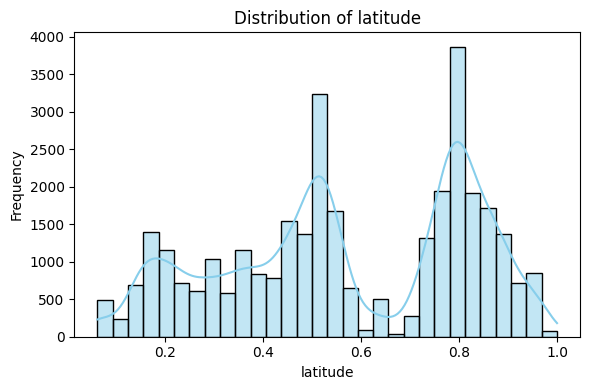

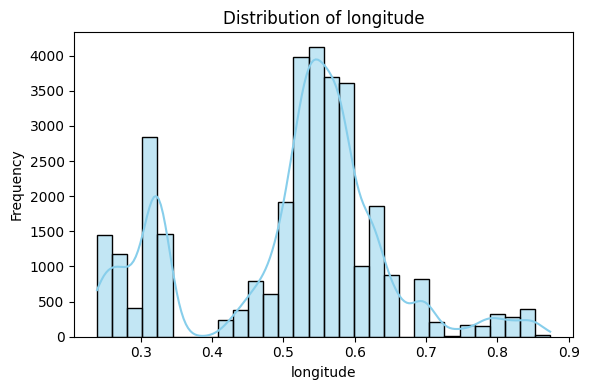

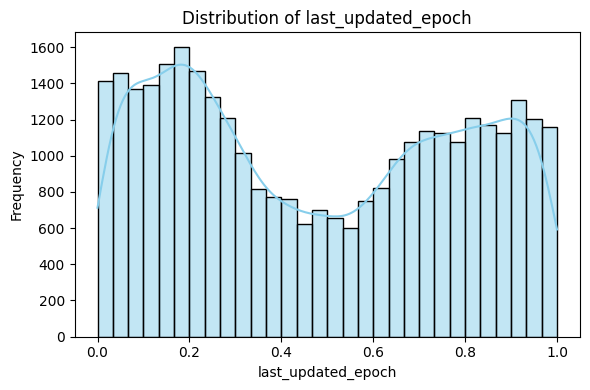

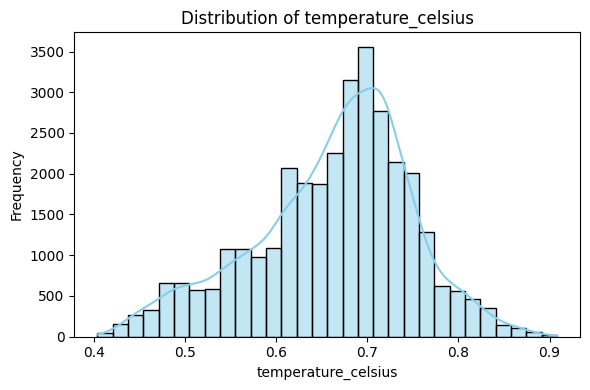

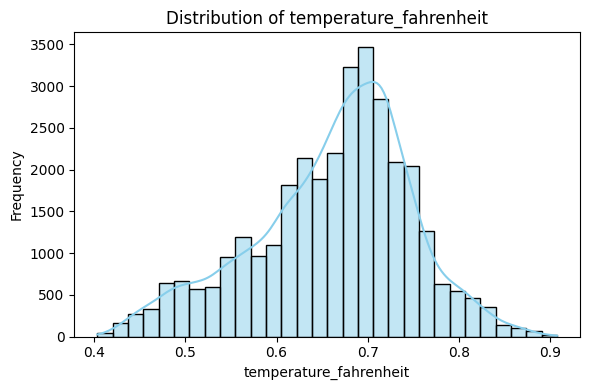

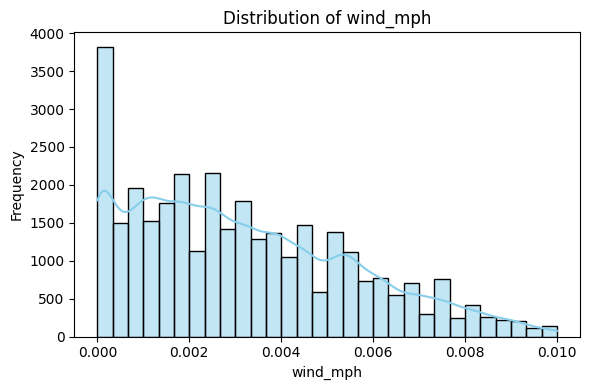

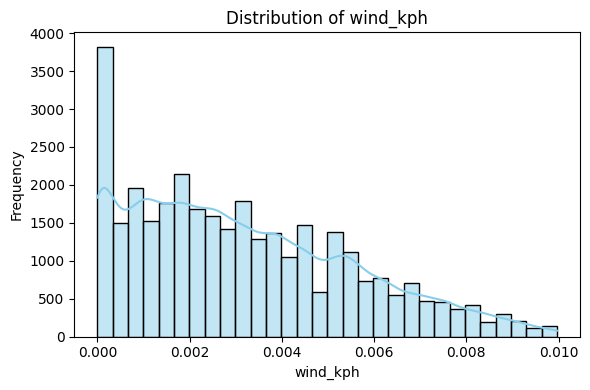

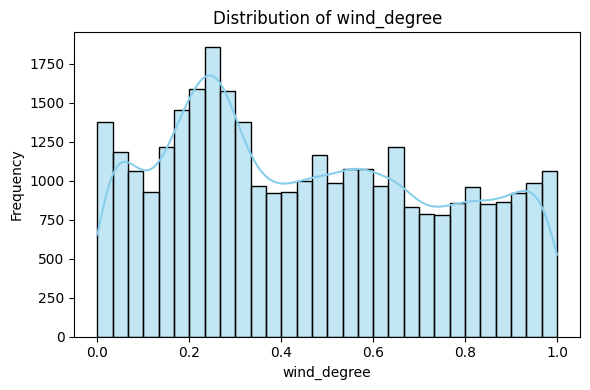

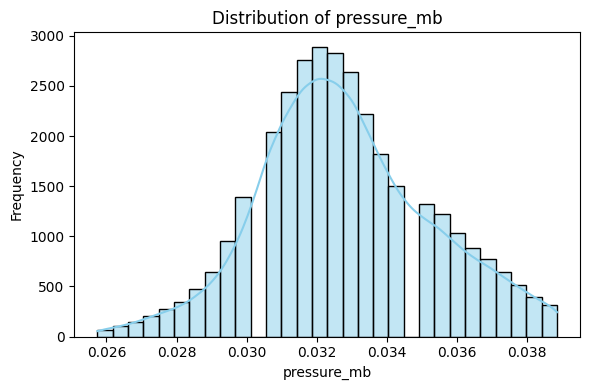

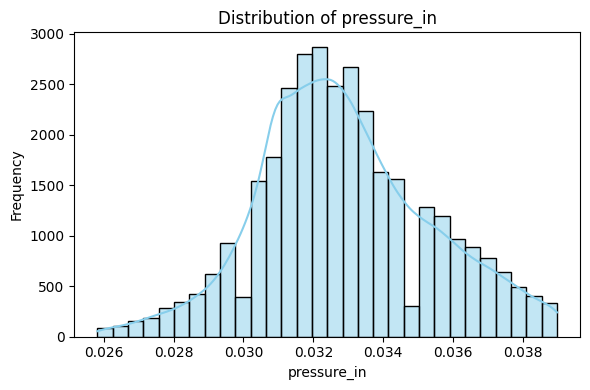

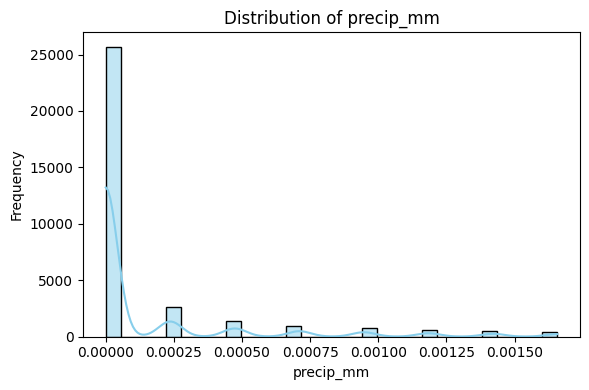

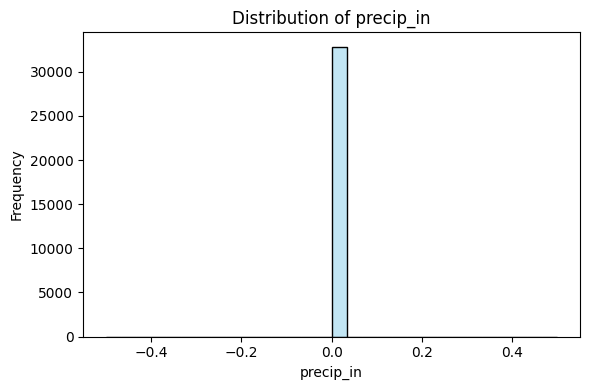

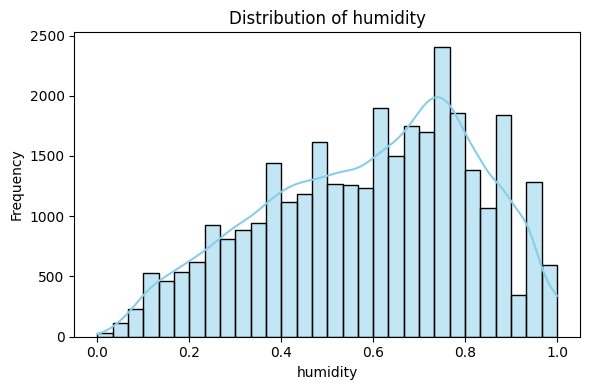

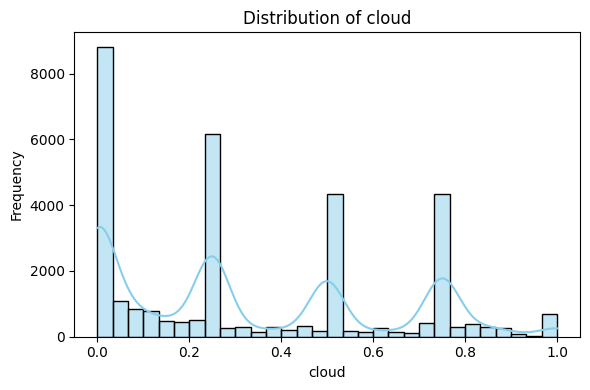

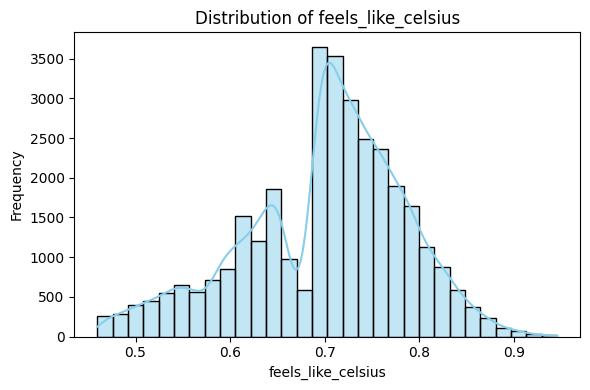

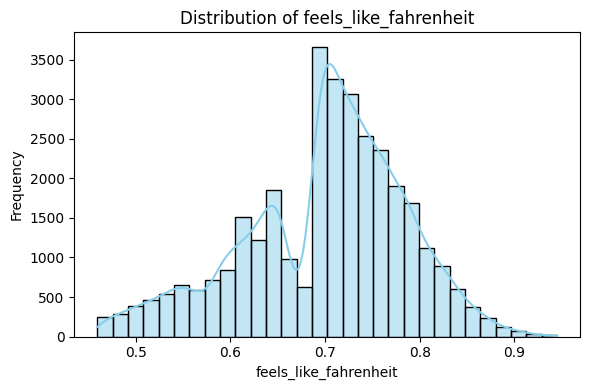

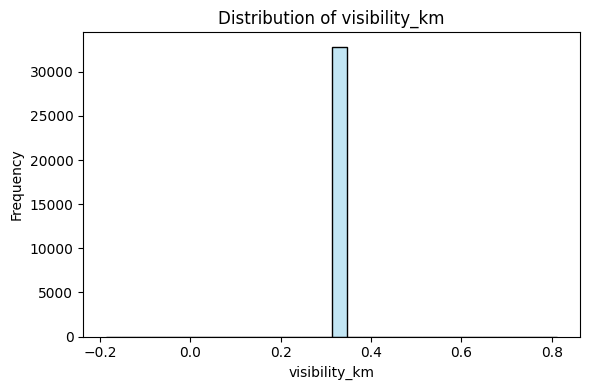

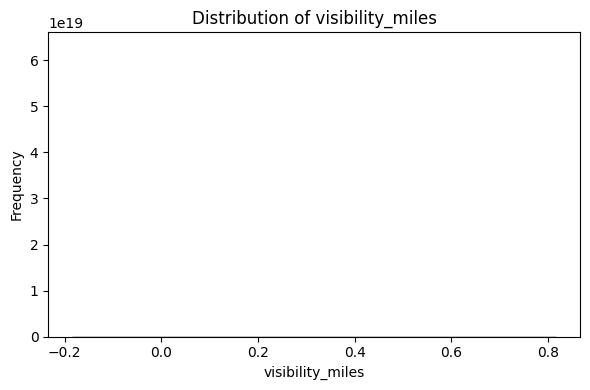

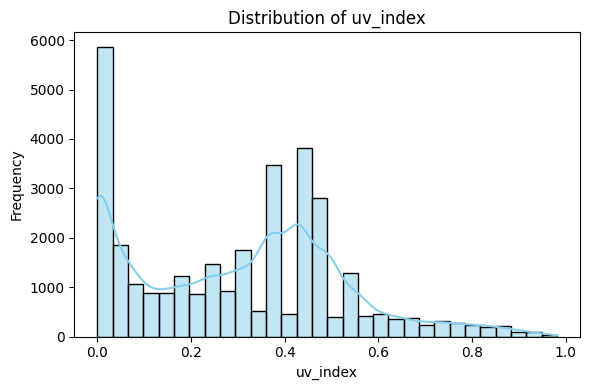

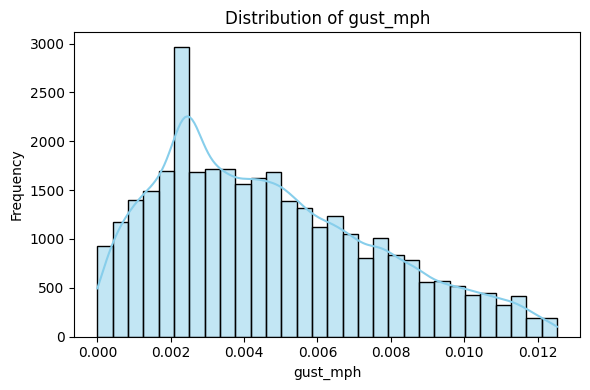

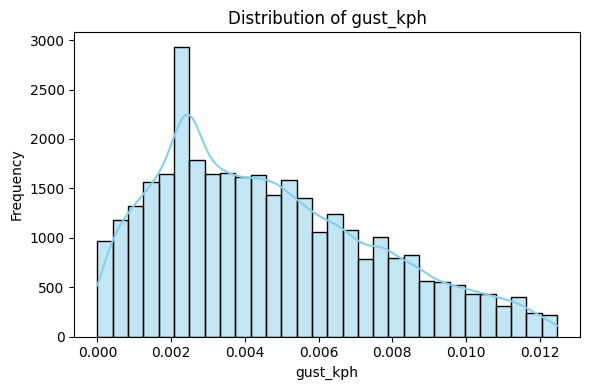

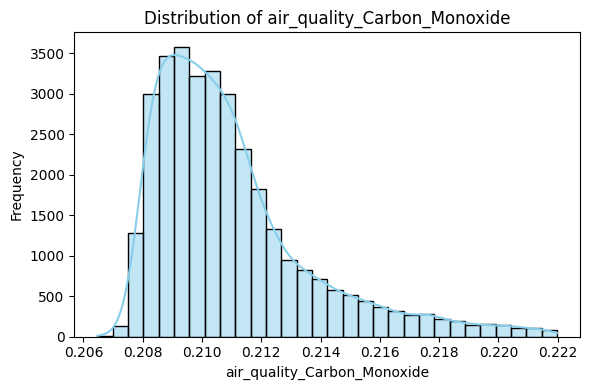

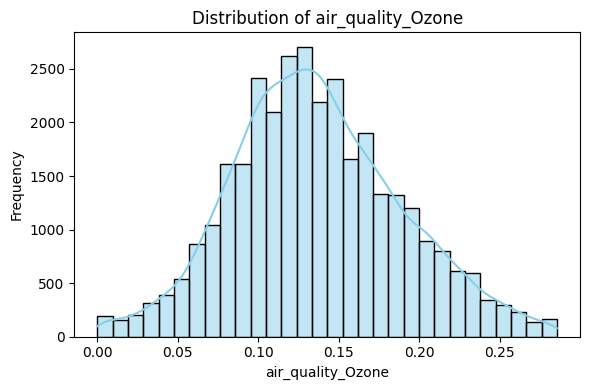

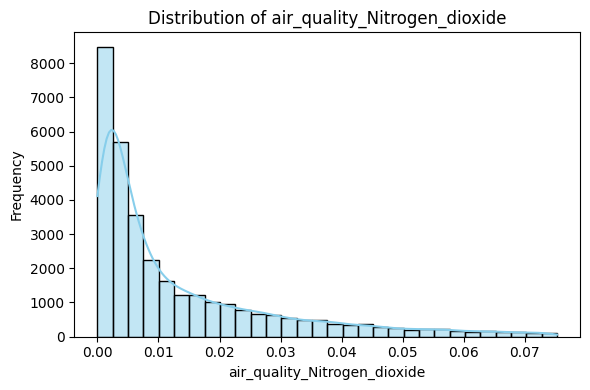

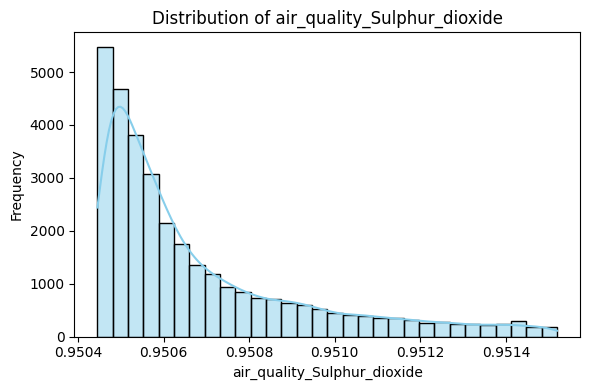

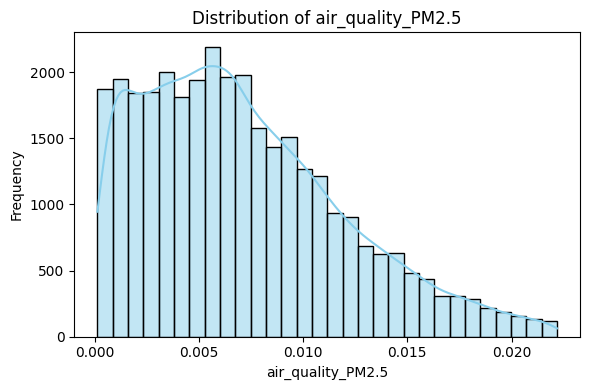

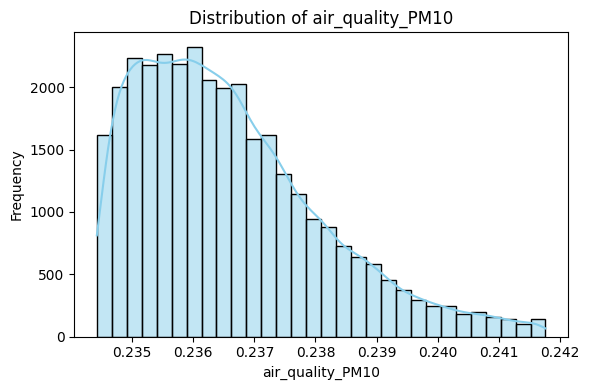

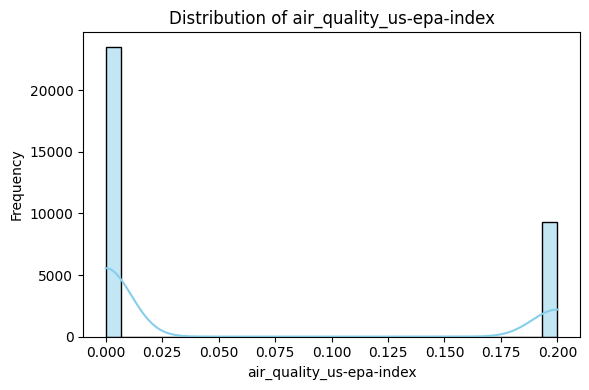

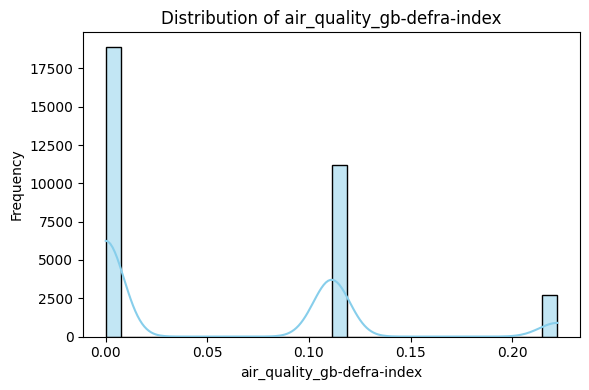

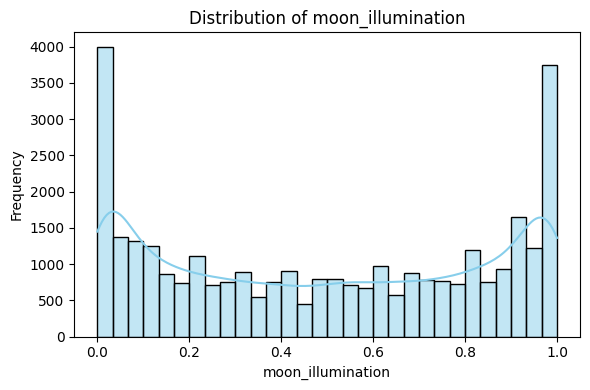

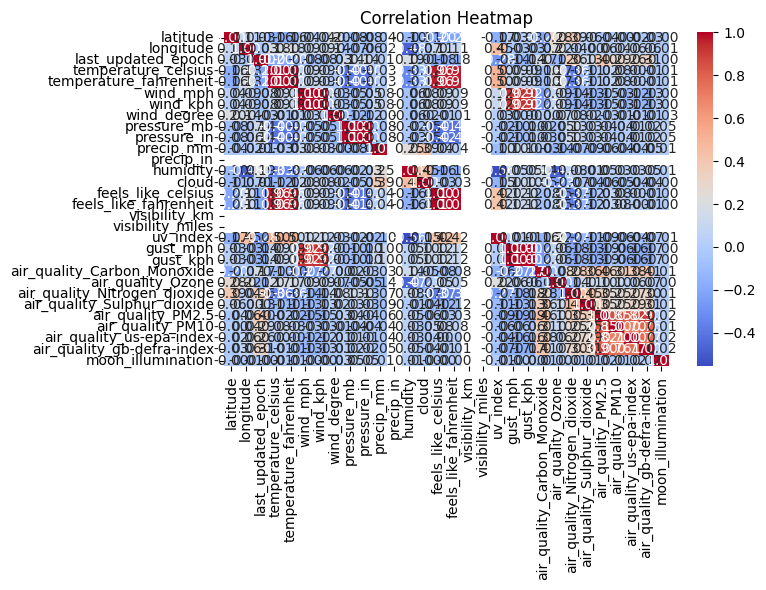

C:\Users\jsrv7\AppData\Local\Temp\ipykernel_16548\3536493706.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\jsrv7\AppData\Local\Temp\ipykernel_16548\3536493706.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


✅ Date column detected: latitude



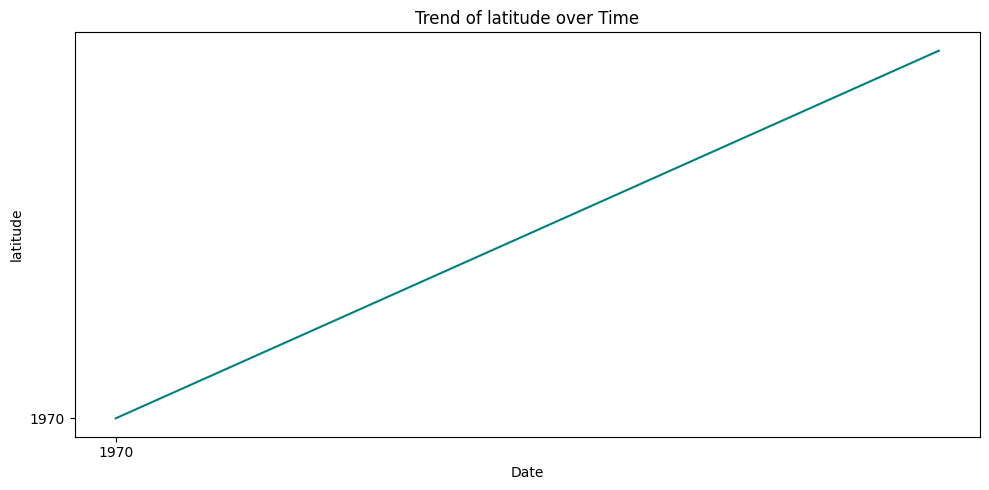

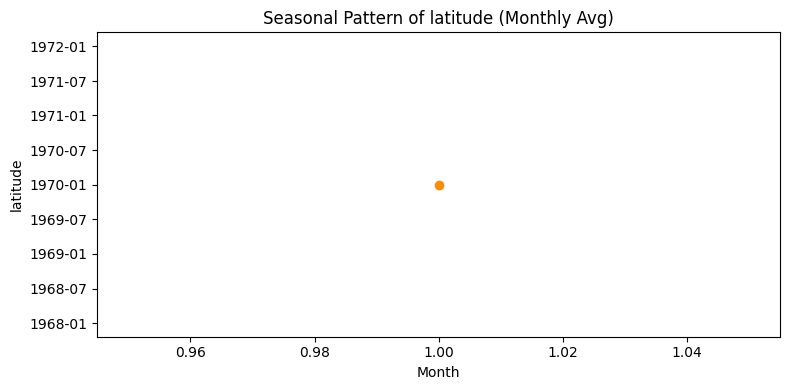


✅ Statistical analysis completed successfully.


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("C:/Users/jsrv7/.vscode/cleaned_dataset.csv")

print("✅ Dataset loaded successfully!\n")
print(df.info(), "\n")
print(df.head(), "\n")

# ===============================
# 2. Summary Statistics
# ===============================
print("📊 Summary Statistics:\n")
print(df.describe(include='all'), "\n")

print("🧩 Missing Values:\n")
print(df.isnull().sum(), "\n")

# ===============================
# 3. Distribution of Numeric Columns
# ===============================
numeric_cols = df.select_dtypes(include=np.number).columns

if len(numeric_cols) > 0:
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, color="skyblue", bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
else:
    print("⚠ No numeric columns found.\n")

# ===============================
# 4. Correlation Analysis
# ===============================
if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Not enough numeric columns for correlation analysis.\n")

# ===============================
# 5. Detect Date Column & Trend Analysis
# ===============================
date_col = None
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
    except Exception:
        continue

if date_col:
    print(f"✅ Date column detected: {date_col}\n")
    df = df.sort_values(by=date_col)

    # Select first numeric column for trend
    target = numeric_cols[0] if len(numeric_cols) > 0 else None

    if target:
        plt.figure(figsize=(10, 5))
        plt.plot(df[date_col], df[target], color='teal')
        plt.title(f"Trend of {target} over Time")
        plt.xlabel("Date")
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

        # Monthly seasonal pattern
        df["Month"] = df[date_col].dt.month
        monthly_avg = df.groupby("Month")[target].mean()

        plt.figure(figsize=(8, 4))
        monthly_avg.plot(marker='o', color='darkorange')
        plt.title(f"Seasonal Pattern of {target} (Monthly Avg)")
        plt.xlabel("Month")
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()
else:
    print("⚠ No valid date column found.\n")

print("\n✅ Statistical analysis completed successfully.")


In [3]:





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load Dataset
df = pd.read_csv("cleaned_dataset.csv")
print("✅ Dataset Loaded Successfully!\n")
print(df.info(), "\n")

# 2️⃣ Detect Numeric Weather Columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numeric columns detected: {numeric_cols}\n")

# 3️⃣ Detect Date Column
date_col = None
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
    except Exception:
        continue

if date_col:
    df = df.sort_values(by=date_col)
    print(f"📅 Date column detected: {date_col}\n")
else:
    print("⚠ No valid date column found!\n")

# 4️⃣ Define Extreme Weather Thresholds Automatically
extreme_events = pd.DataFrame()

for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    high_threshold = mean_val + 2 * std_val
    low_threshold = mean_val - 2 * std_val

    extreme_rows = df[(df[col] > high_threshold) | (df[col] < low_threshold)].copy()
    extreme_rows["Extreme_Type"] = np.where(extreme_rows[col] > high_threshold, "High", "Low")
    extreme_rows["Parameter"] = col
    extreme_events = pd.concat([extreme_events, extreme_rows])

if not extreme_events.empty:
    print(f"🚨 Found {len(extreme_events)} Extreme Weather Records!\n")
    print(extreme_events[[date_col, "Parameter", "Extreme_Type"] + numeric_cols].head())
else:
    print("✅ No extreme weather events detected.\n")

# 5️⃣ Visualize Extreme Events (for main weather parameter)
if len(numeric_cols) > 0:
    main_col = numeric_cols[0]
    plt.figure(figsize=(10, 5))
    plt.plot(df[date_col], df[main_col], label='Normal', color='skyblue')
    
    if not extreme_events.empty:
        plt.scatter(extreme_events[date_col], extreme_events[main_col], 
                    color='red', label='Extreme Event', zorder=5)
    
    plt.title(f"Extreme Weather Detection for {main_col}")
    plt.xlabel("Date")
    plt.ylabel(main_col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6️⃣ Save results
extreme_events.to_csv("extreme_weather_events.csv", index=False)
print("\n💾 Extreme weather events saved to 'extreme_weather_events.csv'")
print("✅ Analysis Completed!")




FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_dataset.csv'